# Assignment 18 Forecasting
## Dataset : Airlines+Data

#### Info. about Forecasting
Forecasting is a technique that uses historical data as inputs to make informed estimates that are predictive in determining the direction of future trends. Businesses utilize forecasting to determine how to allocate their budgets or plan for anticipated expenses for an upcoming period of time. This is typically based on the projected demand for the goods and services offered.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Dataset Loading

In [2]:
Airlines_Data01 = pd.read_excel("D:\Data Science Material\Assignments\Forecasting\Airlines+Data.xlsx")

In [3]:
Airlines_Data01.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### Exploring the dataset

In [4]:
# some mathematical caculation

Airlines_Data01.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
# lets explore about the data types, null cols, dataset length, rows and columns

Airlines_Data01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
Airlines_Data01.shape

(96, 2)

### Data Analysis

In [7]:
# finding NA values null values

Airlines_Data01.isna().sum()

Month         0
Passengers    0
dtype: int64

No. Na \ null values present the dataset

In [8]:
# making the dataset safe

Airlines_Data = Airlines_Data01.copy()

In [9]:
Airlines_Data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [10]:
# Airlines_Data['Month'] = pd.to_datetime(Airlines_Data['Month'])

In [11]:

Airlines_Data["month"] = Airlines_Data.Month.dt.strftime("%b") # month extraction
Airlines_Data["year"] = Airlines_Data.Month.dt.strftime("%Y") # year extraction

In [12]:
month = pd.get_dummies(Airlines_Data['month'])
Airlines_Data = pd.concat([Airlines_Data, month],axis = 1)

In [13]:
Airlines_Data

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
#Airlines_Data.drop('Month',inplace = True,axis = 1)

In [15]:
#Airlines_Data

In [16]:
Airlines_Data.columns.value_counts()

Month         1
Passengers    1
month         1
year          1
Apr           1
Aug           1
Dec           1
Feb           1
Jan           1
Jul           1
Jun           1
Mar           1
May           1
Nov           1
Oct           1
Sep           1
dtype: int64

### Creating variable columns for model creation

In [17]:
Airlines_Data["t"] = np.arange(1,97)
Airlines_Data["t_squared"] = Airlines_Data["t"]*Airlines_Data["t"]
Airlines_Data.columns
Airlines_Data["log_Passengers"] = np.log(Airlines_Data["Passengers"])
Airlines_Data

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


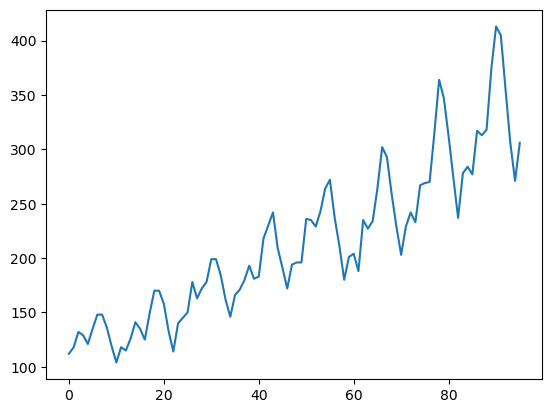

In [18]:
Airlines_Data.Passengers.plot()
plt.show()

#### From the above we can see that it is following Upward linear trend with multiplicative seasonality

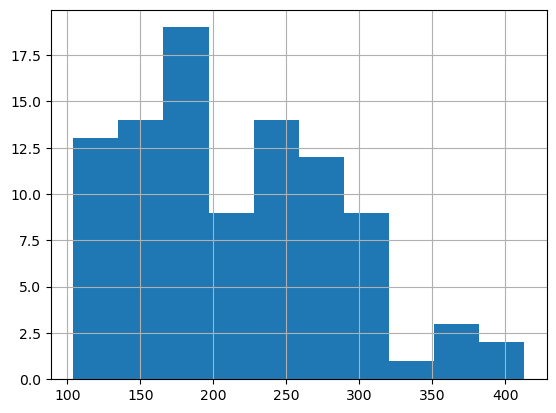

In [19]:
Airlines_Data.Passengers.hist()
plt.show()

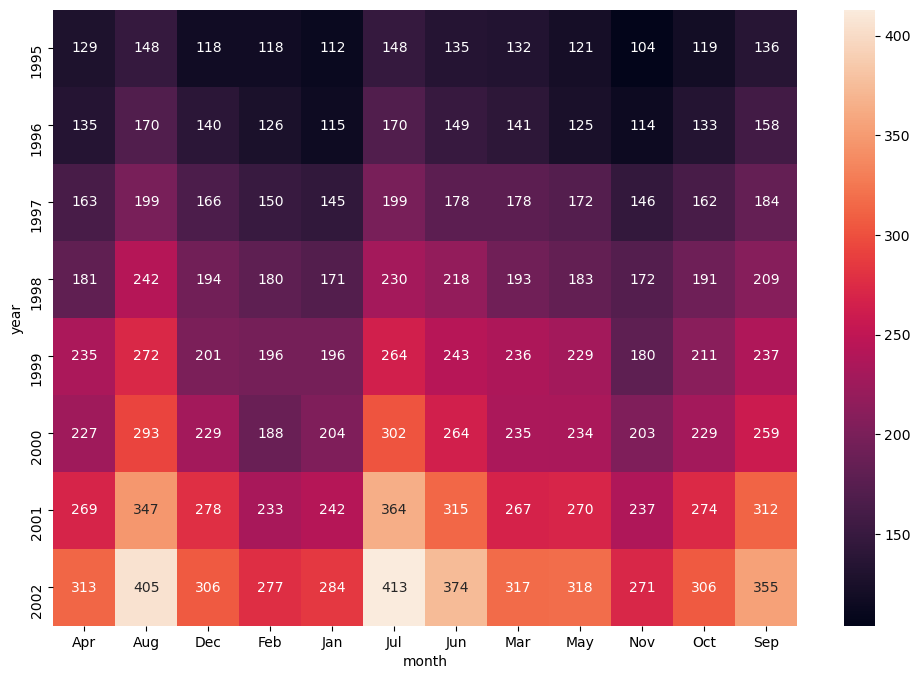

In [20]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines_Data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

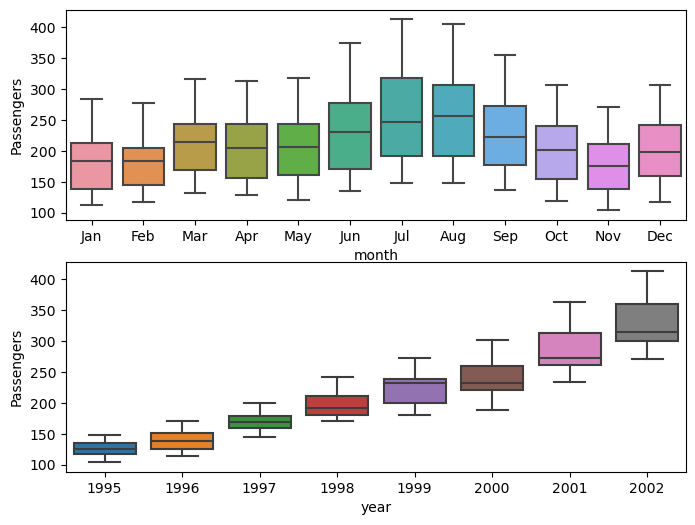

In [21]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airlines_Data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines_Data)
plt.show()

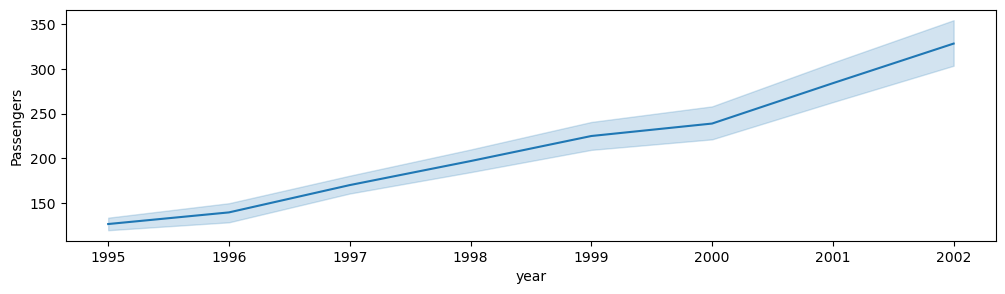

In [22]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines_Data)
plt.show()

### Splitting Data 

In [23]:
Airlines_Data.shape

(96, 19)

In [24]:
Airlines_Data.head(1)

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499


In [25]:
Train = Airlines_Data.head(70)
Test = Airlines_Data.tail(26)

#### Linear Model

In [26]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.30985585336209

#### Exponential

In [27]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


43.47847070446902

#### Quadratic

In [28]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.89814496742656

#### Additive seasonality 

In [29]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

124.97569951828822

#### Additive Seasonality Quadratic 

In [30]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

30.39304289591171

#### Multiplicative Seasonality

In [31]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

129.6291447652631

#### Multiplicative Additive Seasonality 

In [50]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.724791415163637

#### Compare the results 

In [33]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.724791
4,rmse_add_sea_quad,30.393043
1,rmse_Exp,43.478471
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
5,rmse_Mult_sea,129.629145


### Predict for new time period

In [34]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Airlines_Data).fit()

In [51]:
pred_new  = pd.Series(model_full.predict(Airlines_Data))
np.exp(pred_new)

0      1.630760e+44
1      5.509489e+43
2      7.317666e+55
3      7.868655e+52
4      3.012372e+52
          ...      
91    1.449114e+161
92    2.038335e+149
93    3.248891e+137
94    1.513348e+127
95    5.317736e+138
Length: 96, dtype: float64

In [52]:
Airlines_Data["forecasted_Passengers"] = pd.Series(pred_new)

In [53]:
Airlines_Data

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,...,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,forecasted_Footfalls,forecasted_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,1,4.718499,4.689034,101.802790
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,...,0,0,0,0,0,2,4,4.770685,4.713543,100.717631
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,...,1,0,0,0,0,3,9,4.882802,4.859266,128.632471
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,...,0,0,0,0,0,4,16,4.859812,4.816336,121.797312
4,1995-05-01,121,May,1995,0,0,0,0,0,0,...,0,1,0,0,0,5,25,4.795791,4.804379,120.837153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,...,0,0,0,0,0,92,8464,6.003887,5.980028,371.087153
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,...,0,0,0,0,1,93,8649,5.872118,5.872725,343.797312
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,...,0,0,0,1,0,94,8836,5.723585,5.745644,316.632471
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,...,0,0,1,0,0,95,9025,5.602119,5.622215,292.842631


### Multiplicative Additive Seasonality model is the best model for forecasting with 
### lowest RMSE value i.e 11.72

## Data Driven Model

In [38]:
Airlines_Data.head(1)

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,forecasted_Footfalls
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,4.689034


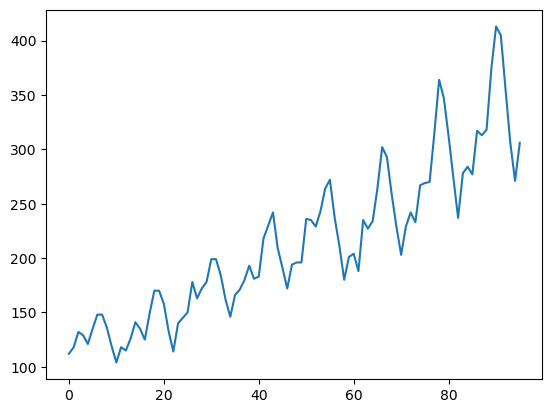

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,forecasted_Footfalls
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,4.689034
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,4.713543
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,4.859266
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,4.816336
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,4.804379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.980028
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.872725
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.745644
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119,5.622215


In [39]:
Airlines_Data.Passengers.plot()
plt.show()
Airlines_Data

### Moving average

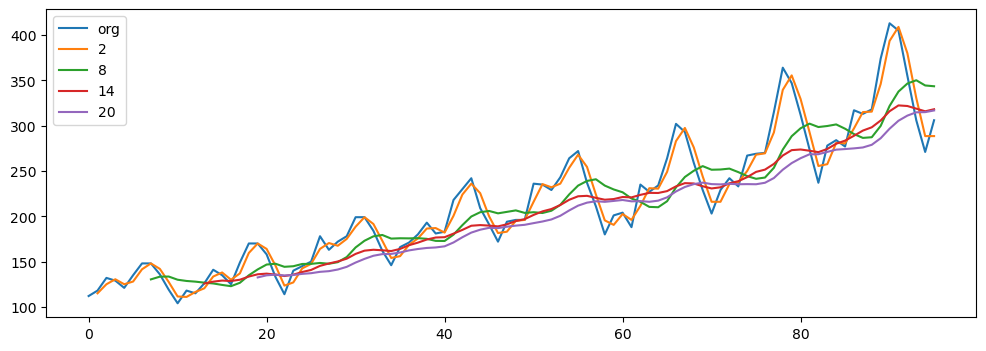

In [40]:
plt.figure(figsize=(12,4))
Airlines_Data.Passengers.plot(label="org")
for i in range(2,24,6):
    Airlines_Data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### Time Series decomposition plot

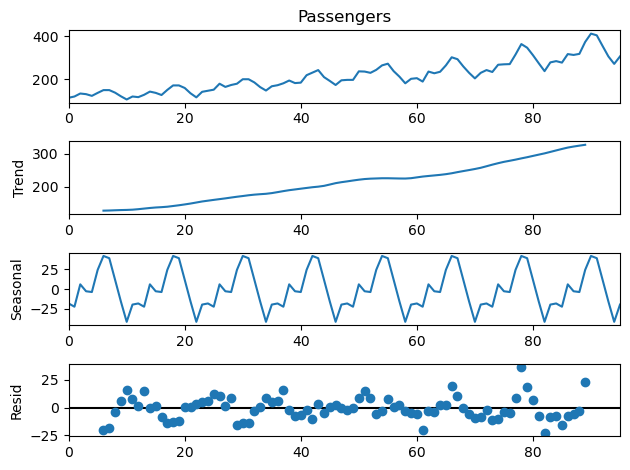

In [41]:
decompose_ts_add = seasonal_decompose(Airlines_Data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

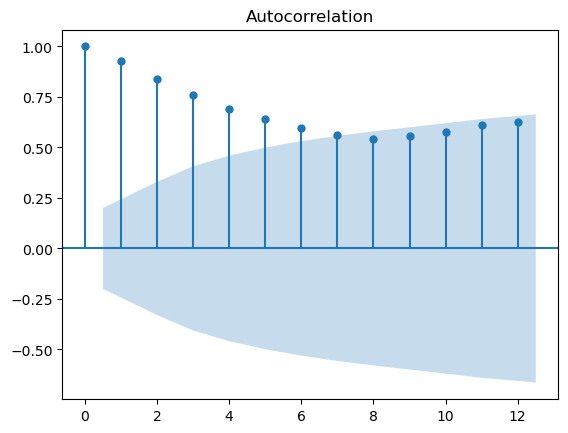

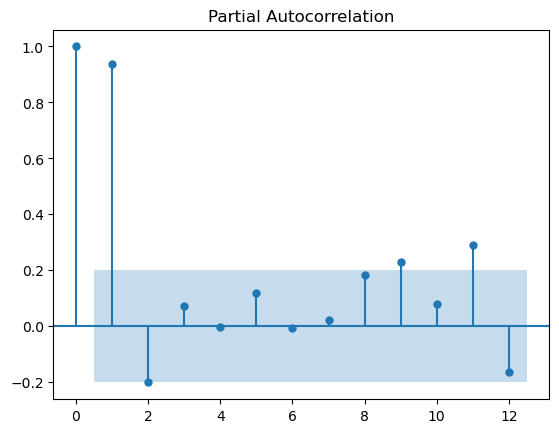

In [42]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Airlines_Data.Passengers,lags=12)
tsa_plots.plot_pacf(Airlines_Data.Passengers,lags=12)
plt.show()


### Evaluation Metric MAPE

In [43]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [44]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


17.662700175279245

### Holt method 

In [45]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-45-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


34.72630547558889

### Holts winter exponential smoothing with additive seasonality and additive trend

In [46]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

10.80194843580534

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [47]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

9.102898246943349

### Final Model by combining train and test

In [48]:
hwe_model_add_add = ExponentialSmoothing(Airlines_Data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [49]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235284
97     311.528413
98     350.278738
99     346.985064
100    351.845130
101    403.925766
102    440.566807
103    427.446405
104    376.628081
105    329.767444
dtype: float64

## Holts winter exponential smoothing with multiplicative seasonality and additive trend model is the best for forecasting 
## because its RMSE value is : 9.10 which is very less 